<a href="https://colab.research.google.com/github/julianafalves/Sinais-Digitais/blob/main/Projeto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1o Trabalho de PSD (notebook para preencher com os resultados)

### Número do Grupo : `inserir o número do grupo aqui`

In [1]:
!pip install scikit_dsp_comm

In [2]:
import sk_dsp_comm.sigsys as ss
import numpy as np
from matplotlib import pylab
from pylab import *
import scipy.signal as signal
from IPython.display import Audio, display
from IPython.display import Image, SVG

In [3]:
pylab.rcParams['savefig.dpi'] = 100 # default 72
pylab.rcParams['figure.figsize'] = (6.0, 4.0) # default (6,4)
%config InlineBackend.figure_formats=['png'] # default for inline viewing
#config InlineBackend.figure_formats=['svg'] # SVG inline viewing
#%config InlineBackend.figure_formats=['pdf'] # render pdf figs for LaTeX

# Problema 1
 Usando a função stem() em Python calcule e plote as seguintes funções
$$
\begin{align}
    x_1[n] &= \sin\big(\frac{\pi}{5}n\big),\ 0\leq n \leq 15 \\
    x_2[n] &= \cos\big(\frac{3\pi}{5}n\big),\ 0\leq n \leq 15 \\
    x_3[n] &= \sin\big(\frac{\pi}{4}n\big)\cos\big(\frac{\pi}{4}n\big),\ 0\leq n \leq 32
\end{align}
$$
Qual é o período da fundamental de cada sinail?

In [4]:
pi = np.pi

## Parte a - sinal $x_1[n]$
O período da fundamental, $N$, é 10

`adicione o resultado aqui e explicação de como ele foi determinado`

In [5]:
def x1(n):
   return np.sin((np.pi/5)*n)
   
n = np.arange(0, 16, dtype= 'int64')

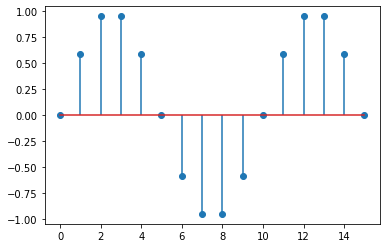

In [6]:
stem(n,x1(n), use_line_collection=True)
show()

In [7]:
def fundamentalFunc(omega): #pi/5 /pi
  numerador = 2 * np.pi
  if omega % np.pi == 0 or np.pi % (np.pi/5) == 0:
    k = 1
    while True:
      N = (numerador * k / omega)
      k += 1
      if N.is_integer():
        return N
  return None
    

In [8]:
periodo = fundamentalFunc(np.pi/5)
print(periodo)

10.0


## Parte b - sinal $x_2[n]$
O período da fundamental, $N$, é

`adicione o resultado aqui e explicação de como ele foi determinado`

In [9]:
# escreva o seu código aqui

## Parte c - sinal $x_3[n]$
Para encontrar o período, primeiro expanda o produto usando uma relação trigonomêtrica apropriada:
$$
    x_3[n] = \frac{1}{2}\left[\sin(0\cdot n) + \sin\big(\frac{\pi}{2}n\big)\right], 0\leq n\leq 32
$$
Você deve escolher $N$ tal que $\ldots$

`adicione o resultado aqui e explicação de como ele foi determinado`


In [10]:
def x3(n):
  return (1/2)*np.sin((n*pi)/2)
n3 = np.arange(0,33,dtype='int64')

<function matplotlib.pyplot.show>

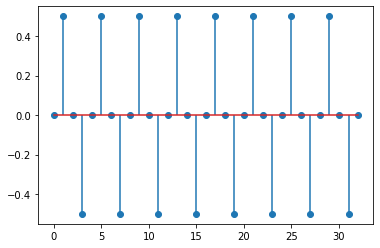

In [11]:
stem(n3,x3(n3), use_line_collection=True)
show

In [12]:
print("Período fundamental: ",fundamentalFunc(pi/2))

Período fundamental:  4.0


# Problema 2
Usando a função `stem()` calcule e plote a o sinal
$$
x[n] = \begin{cases}
        2n+1, & -3\leq n\leq 3 \\
        0, & \text{otherwise}
        \end{cases}
$$
no intervalo $-8\leq n\leq 8$. 

OBS: Criar a função $x[n]$ sem o uso de loop!! Observe ainda que o módulo python “sk_dsp_comm.sigsys” possui a função drect() que serve para criar uma função janela - estude o exemplo python ex2.py fornecido na aba “Material para realização dos projetos”. 

In [13]:
n = np.arange(-8,9)
x = (2*n + 1) * ss.drect(n+3, N=7)

<function matplotlib.pyplot.show>

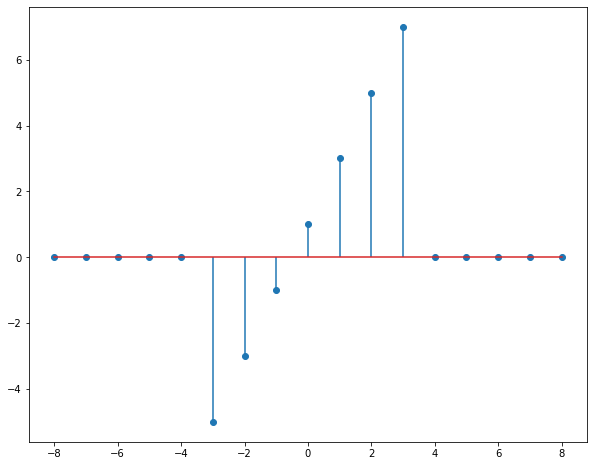

In [14]:
figure(figsize=(10,8))
stem(n,x, use_line_collection=True)
show

# Problema 3
Usando a função `stem()` calcule e plote o sinal
$$
    x[n] = u[n]u[8-n] + u[n-2]-u[n-5]
$$
no intervalo $-2\leq n\leq 16$.  Observe que o módulo  `sigsys`  (aliased  como  `ss`)  possui a função `dstep()` definida, a qual pode tornar esse problema bastante simples.

OBS: Estude os exemplos ex1.py e ex2.py fornecidos na aba “Material para realização dos projetos”.

In [15]:
n = np.arange(-2,16+1)
x = ss.dstep(n)*ss.dstep(8-n)+ss.dstep(n-2)-ss.dstep(n-5)

Text(0.5, 1.0, 'u[n]*u[8-n]')

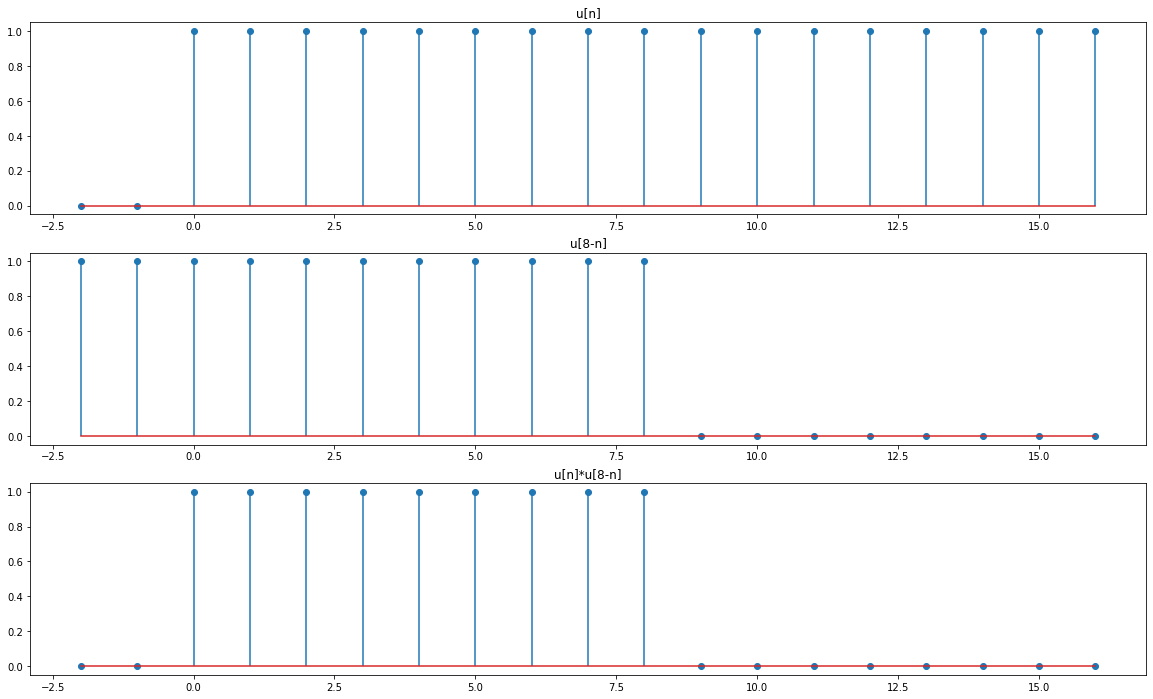

In [16]:
fig, axs = plt.subplots(3, 1, sharey=True,figsize=(20,12))


axs[0].stem(n, ss.dstep(n), use_line_collection=True)
axs[0].set_title('u[n]')

axs[1].stem(n, ss.dstep(8-n), use_line_collection=True)
axs[1].set_title('u[8-n]')

axs[2].stem(n, ss.dstep(n)*ss.dstep(8-n), use_line_collection=True)
axs[2].set_title('u[n]*u[8-n]')

Text(0.5, 1.0, 'u[n]*u[8-n]+u[n-2]-u[n-5]')

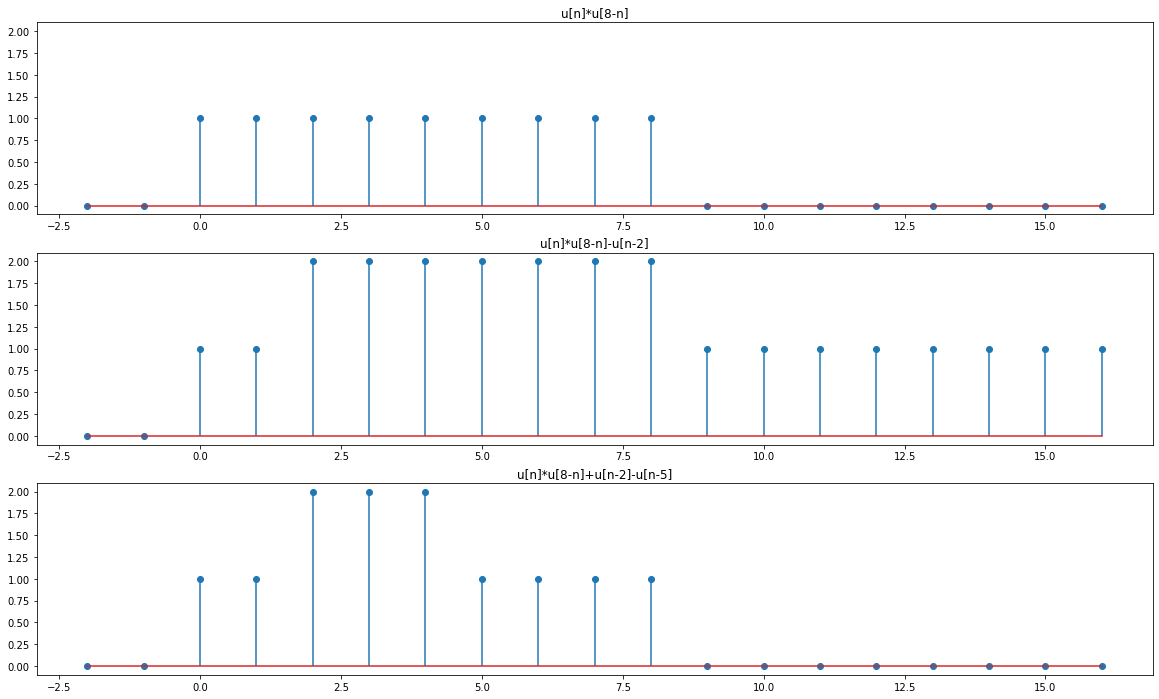

In [17]:
fig, axs = plt.subplots(3, 1, sharey=True, figsize=(20,12))
axs[0].stem(n, ss.dstep(n)*ss.dstep(8-n), use_line_collection=True)
axs[0].set_title('u[n]*u[8-n]')

axs[1].stem(n, ss.dstep(n)*ss.dstep(8-n)+ss.dstep(n-2), use_line_collection=True)
axs[1].set_title('u[n]*u[8-n]-u[n-2]')

axs[2].stem(n, ss.dstep(n)*ss.dstep(8-n)+ss.dstep(n-2)-ss.dstep(n-5), use_line_collection=True)
axs[2].set_title('u[n]*u[8-n]+u[n-2]-u[n-5]')

# Problema 4
Considere o sinal
$$
    y[n] = \begin{cases}
        2, & n=0 \\
        1, & n=1 \\
        -1, & n=3 \\
        3, & n=4 \\
        0, & \text{caso contrário}
    \end{cases}
$$

Escreva uma função python ($y[n]$) como indicado abaixo para que você possa responder as questões que seguem.

In [18]:
def y(n):
    """
    Use a função dimpulse do módulo sigsys para diretamente definir 
    o sinal y[n]
    """
    yy = 2*ss.dimpulse(n) + 1*ss.dimpulse(n-1) - ss.dimpulse(n-3) + 3*ss.dimpulse(n-4)
    return yy

In [19]:
n = np.arange(-4,10)

## Parte a
Usando a função `stem()` plote $z_1[n] = y[n-2]$.

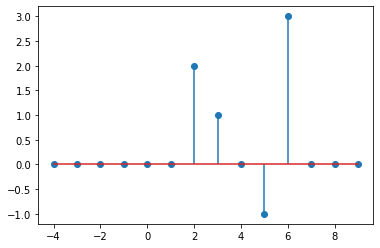

In [20]:
stem(n,y(n-2), use_line_collection=True)
show()

## Parte b
Usando a função `stem()` plote $z_2[n] = y[n+2]$.

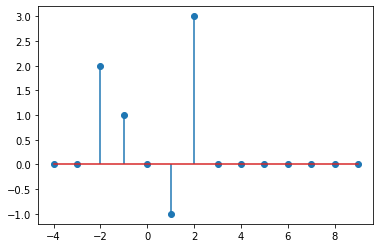

In [21]:
stem(n,y(n+2), use_line_collection=True)
show()

## Parte c
Usando a função `stem()` plote $z_3[n] = y[-n]$.

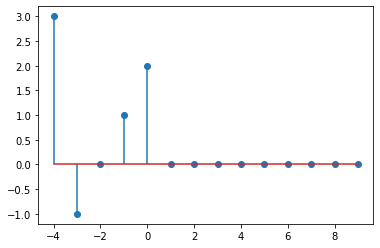

In [22]:
stem(n,y(-n), use_line_collection=True)
show()

# Problema 5
Dado os sinais abaixo:
$$
\begin{align}
    x_1[n] &= \{1,2,-3,2,1,1\} \;\;\;\; h_1[n] = \{1,2,-3\}\\
    x_2[n] &= \{0,0,0,0,1,1,1,1,0,0,0,0,-1,-1,-1,-1,0,0,0,0\}  \;\;\;\;  h_{2}[n]=\{1,4,10,16,19,16,10,4,1\}
\end{align}
$$

## Parte a
Escrever uma função na linguagem python (__"sem usar funções prontas de qualquer biblioteca"__) para fazer a __convolução__ entre dois sinais unidimensionais (1D). 

**Solução:** Para a operação de convolução, usamos o método apresentado em aula de deslocar $h[n]$ (após fazer o *flip*) e preencher os espaços com zero. Consideramos que o elemento $n=0$ é o primeiro elemento de cada sinal.

Para exemplificar, tomemos $x_1[n]$ e $h_1[n]$. Então, na primeira iteração teríamos a seguinte operação:

```
[ 0  0  1  2 -3  2  1  1  0  0 ]
              *
[-3  2  1  0  0  0  0  0  0  0 ]
================================
[ 0  0  1  0  0  0  0  0  0  0 ] (+)=> 1 = y[0]
```

Para a segunda iteração, teríamos:

```
[ 0  0  1  2 -3  2  1  1  0  0 ]
              *
[ 0 -3  2  1  0  0  0  0  0  0 ]
================================
[ 0  0  2  2  0  0  0  0  0  0 ] (+)=> 4 = y[1]
```

E assim por diante, até chegar ao fim de $x[n]$.

Para implementação deste método, realizamos o preenchimento demonstrados com os zeros no início e no fim de $x[n]$, invertendo $h[n]$ e completando com zeros para que os sinais tenham o mesmo tamanho de lista. Então, para a saída $y[n]$, os elementos são "pareados" com a função ```zip()``` e a multiplicação dos pares de elementos é feita em uma *list comprehension*, cujo somatório é feito com ```sum()```. Para avançar no loop, como no método, $h[n]$ é rotacionado para a direita.


In [23]:
def conv(x,h):
  '''Recebe um sinal de entrada x[n] e uma resposta impulsiva h[n] e retorna a convolução y[n] dos dois sinais.'''

  # Tamanho do preenchimento com 0s
  tam_extra = len(h) - 1

  # Preenche x[n] com 0s no começo e no fim
  x = tam_extra * [0] + x + tam_extra * [0]

  # Inverte h[n] e preenche com 0s até o tamanho de x[n]
  h = h[::-1] + (len(x)-len(h)) * [0]

  # Saída
  y = []

  for _ in range(len(x) - tam_extra):
    # Somatório dos produtos dos elementos de x e h
    yn = sum([a * b for a, b in zip(x, h)])
    y.append(yn)

    # Deslocamento de h para a direita
    h = [0] + h[:-1]
  
  return y

## Parte b
Faça a convolução entre os sinais $x_1*h_1$ e $x_2*h_2$ e plote usando a função stem os sinais originais e os resultados das convoluções.

In [24]:
# Definição dos sinais x1 e h1
x1 = [1, 2, -3, 2, 1, 1]
h1 = [1, 2, -3]

# Definição dos sinais x2 e h2
x2 = [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, -1, -1, -1, -1, 0, 0, 0, 0]
h2 = [1, 4, 10, 16, 19, 16, 10, 4, 1]

### $x_1 * h_1$
Abaixo estão os gráficos dos sinais originais $x_1[n]$ e $h_1[n]$ e o gráfico do resultado da convolução entre os dois sinais, $y_1[n]$.

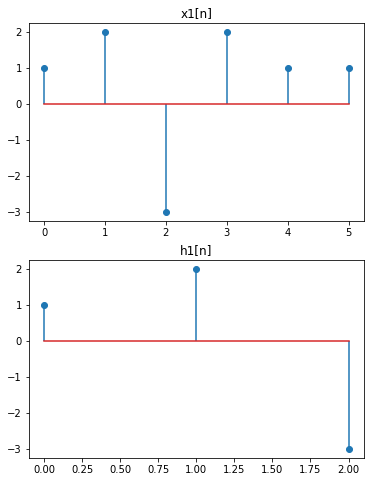

In [25]:
fig = figure(figsize=(6,8))

sub1 = fig.add_subplot(211)
sub1.set_title('x1[n]')
sub1.stem(x1, use_line_collection=True)

sub2 = fig.add_subplot(212)
sub2.set_title('h1[n]')
sub2.stem(h1, use_line_collection=True)

show()

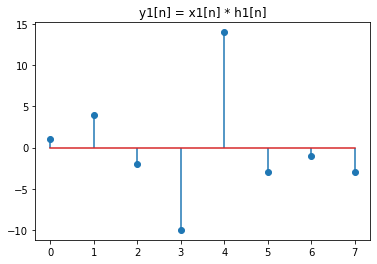

In [26]:
conv_x1_h1 = conv(x1,h1)

stem(conv_x1_h1, use_line_collection=True)
plt.title('y1[n] = x1[n] * h1[n]')
show()

### $x_2 * h_2$
Abaixo estão os gráficos dos sinais originais $x_2[n]$ e $h_2[n]$ e o gráfico do resultado da convolução entre os dois sinais, $y_2[n]$.

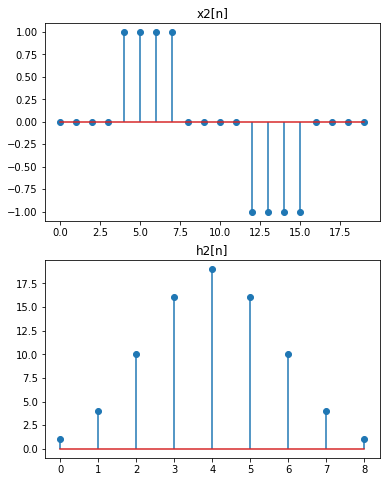

In [27]:
fig = figure(figsize=(6,8))

sub1 = fig.add_subplot(211)
sub1.set_title('x2[n]')
sub1.stem(x2, use_line_collection=True)

sub2 = fig.add_subplot(212)
sub2.set_title('h2[n]')
sub2.stem(h2, use_line_collection=True)

show()

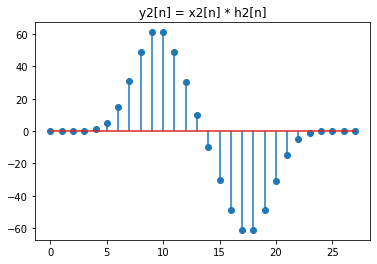

In [28]:
conv_x2_h2 = conv(x2,h2)

stem(conv_x2_h2, use_line_collection=True)
plt.title('y2[n] = x2[n] * h2[n]')
show()

## Parte c
De maneira similar à "Parte b" do exercício, usando __o mesmo código da função convolução__, faça a __correlação__ entre os sinais e plote os resultados.

Dica, lembre-se que:

Convolução: $ y[n] = \sum_{k=-\infty}^{\infty} x[k]h[n-k]$

Correlação: $ y[n] = \sum_{k=-\infty}^{\infty} x[k]h[n+k]$

**Solução:** A implementação da função de correlação é bastante similar à função apresentada de convolução na **Parte a**. A única mudança feita foi que o sinal de $h[n]$ não recebe mais um *flip*, mas sim utilizado em sua ordem original.

In [29]:
def corr(x,h):
  '''Recebe um sinal de entrada x[n] e uma resposta impulsiva h[n] e retorna a correlação y[n] dos dois sinais.'''

  # Tamanho do preenchimento com 0s
  tam_extra = len(h) - 1

  # Preenche x[n] com 0s no começo e no fim
  x = tam_extra * [0] + x + tam_extra * [0]

  # Preenche h[n] com 0s até o tamanho de x[n]
  h = h + (len(x)-len(h)) * [0]

  # Saída
  y = []

  for _ in range(len(x) - tam_extra):
    # Somatório dos produtos dos elementos de x e h
    yn = sum([a * b for a, b in zip(x, h)])
    y.append(yn)

    # Deslocamento de h para a direita
    h = [0] + h[:-1]
  
  return y

### $\text{corr(}x_1, h_1\text{)}$
Abaixo está o gráfico do resultado da correlação $y_1[n]$ entre os sinais $x_1[n]$ e $h_1[n]$.

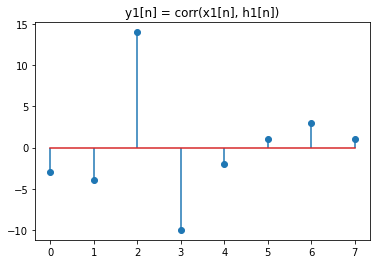

In [30]:
corr_x1_h1 = corr(x1,h1)

stem(corr_x1_h1, use_line_collection=True)
plt.title('y1[n] = corr(x1[n], h1[n])')
show()

### $\text{corr(}x_2, h_2\text{)}$
Abaixo está o gráfico do resultado da correlação $y_2[n]$ entre os sinais $x_2[n]$ e $h_2[n]$.

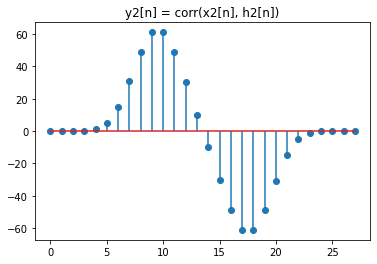

In [31]:
corr_x2_h2 = corr(x2,h2)

stem(corr_x2_h2, use_line_collection=True)
plt.title('y2[n] = corr(x2[n], h2[n])')
show()

## Parte d
Utilize agora a função da biblioteca numpy (numpy.convolve) para realizar as mesmas convoluções da "Parte a". Use a função numpy.convolve - mode{‘full’} e discuta os resultados.

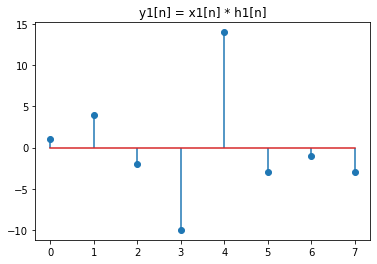

In [32]:
np_conv_x1_h1 = np.convolve(x1, h1, mode='full')

stem(np_conv_x1_h1, use_line_collection=True)
plt.title('y1[n] = x1[n] * h1[n]')
show()

In [33]:
print('Implementação própria:')
print('\ty1[n] =', conv_x1_h1)
print('NumPy:')
print('\ty1[n] =', list(np_conv_x1_h1))

Implementação própria:
	y1[n] = [1, 4, -2, -10, 14, -3, -1, -3]
NumPy:
	y1[n] = [1, 4, -2, -10, 14, -3, -1, -3]


In [34]:
print(conv_x1_h1 == list(np_conv_x1_h1))

True


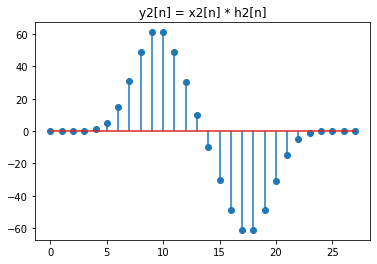

In [35]:
np_conv_x2_h2 = np.convolve(x2, h2, mode='full')

stem(np_conv_x2_h2, use_line_collection=True)
plt.title('y2[n] = x2[n] * h2[n]')
show()

In [36]:
print('Implementação própria:')
print('\ty2[n] =', conv_x2_h2)
print('NumPy:')
print('\ty2[n] =', list(np_conv_x2_h2))

Implementação própria:
	y2[n] = [0, 0, 0, 0, 1, 5, 15, 31, 49, 61, 61, 49, 30, 10, -10, -30, -49, -61, -61, -49, -31, -15, -5, -1, 0, 0, 0, 0]
NumPy:
	y2[n] = [0, 0, 0, 0, 1, 5, 15, 31, 49, 61, 61, 49, 30, 10, -10, -30, -49, -61, -61, -49, -31, -15, -5, -1, 0, 0, 0, 0]


In [37]:
print(conv_x2_h2 == list(np_conv_x2_h2))

True


Podemos ver que a implementação feita pelo grupo obteve exatamente os mesmos resultados que a função do NumPy, sem considerar as questões de desempenho. Enquanto nossa solução apresentada foi iterativa, as funções da biblioteca provavelmente são mais otimizadas (e paralelizadas), fazendo uso de suas estruturas de dados especializadas.